In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])


In [7]:
model=tf.keras.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

In [8]:
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [10]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.2789 - loss: 1.9325 - val_accuracy: 0.4260 - val_loss: 1.5731
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3424 - loss: 1.7658 - val_accuracy: 0.4679 - val_loss: 1.5004
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3602 - loss: 1.7262 - val_accuracy: 0.4886 - val_loss: 1.4330
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.3667 - loss: 1.7062 - val_accuracy: 0.4987 - val_loss: 1.4130
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3890 - loss: 1.6632 - val_accuracy: 0.5095 - val_loss: 1.3829
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3926 - loss: 1.6507 - val_accuracy: 0.5125 - val_loss: 1.3663
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.3992 - loss: 1.6390 - val_accuracy: 0.4899 - val_loss: 1.4144
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.3988 -

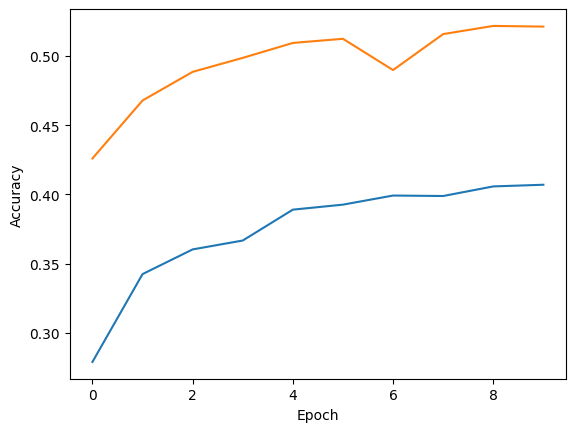

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()